<a href="https://colab.research.google.com/github/aguusandy/pdi-2024/blob/master/entrega1_Lopez_Andino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Entrega de práctica 1 de Andino Agustin y Lopez Lorenzo

## Guía 1 - Ejercicio 3

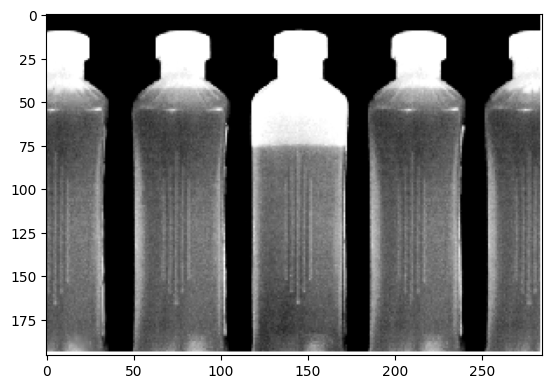

In [36]:
# ploteo de la imagen de las botellas
import cv2
from matplotlib import pyplot as plt
import numpy as np

url_img_botella = "botellas.tif"
img_botella = cv2.imread(url_img_botella,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_botella,cmap='gray')

### Para saber si una botella esta llena se consideran los siguientes pasos:

1. Coloco una linea horizontal como el limite minimo para que se considere llena la botella
2. Consido una aproximacion de 100 pixeles por botella
3. Comienzo a recorrer los pixeles del eje x, hasta que los proximos 5 pixeles a la derecha tengan valor 0, es decir, sea el fondo negro. Mantengo este contador para saber en que pixel x me encuentro, de modo de estar sobre la botella
4. Saco un promedio de la intensidad

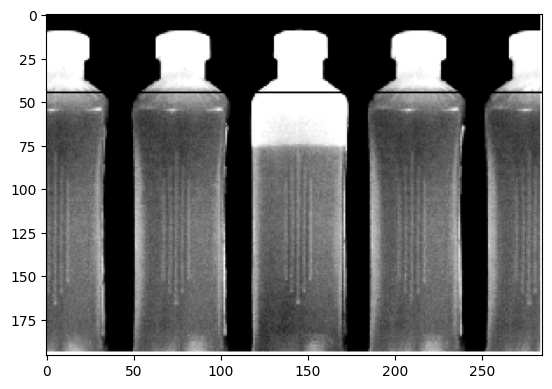

In [2]:
# propongo la linea limite donde considero que esta llena la botella
lim_y = 45
img_botella_min = img_botella.copy()
# tamaño de pixeles en x e y para la imagen
size_x = img_botella_min.shape[1]
size_y = img_botella_min.shape[0]
cv2.line(img_botella_min, (0,lim_y), (size_x,lim_y), color=(0, 255, 0) , thickness=1)
plt.imshow(img_botella_min,cmap='gray')

In [3]:
def funcion_mayor(vector,escalar):
  res = vector > escalar
  return res.any() == False

def pos_termina_botella(pos_actual,img,max_x):
  # uso y = 100
  contador = pos_actual
  while img[100,contador] > 0 and contador < max_x-1:
    contador+=1
  return contador

In [4]:
# recorro en x, por debajo de la linea limite, para saber si me encuentro dentro de una botella
# si la intensidad en [x,y] es 0 entonces estoy fuera
# si la intensidad en [x,y] es mayor a 0 entonces estoy dentro de una botella
# si la intensidad en [x,y] es 255 entonces esta vacia la botella
pos_x = 0
botella = True
vector_botellas = []
while pos_x < size_x-1:
  final_botella = pos_termina_botella(pos_x,img_botella_min,size_x)
  dif_pixeles = final_botella - pos_x
  # verifico si estoy dentro de una botella
  if img_botella_min[lim_y-1,pos_x + int(dif_pixeles/2)] > 0:
    # encuentro donde termina la botella
    if img_botella_min[lim_y-1,pos_x + int(dif_pixeles/2)] == 255: # esta vacia la botella, entonces la remarco
      # remarco la botella vacia
      print("pos x ",pos_x)
      print("final_botella ",final_botella)
      print("dif pixeles ",dif_pixeles)
      vector_botellas.append([[pos_x,lim_y-10],[pos_x+dif_pixeles,size_y]])
    pos_x = final_botella
  else:
    pos_x+=1

pos x  118
final_botella  172
dif pixeles  54


[118, 35]
[172, 196]


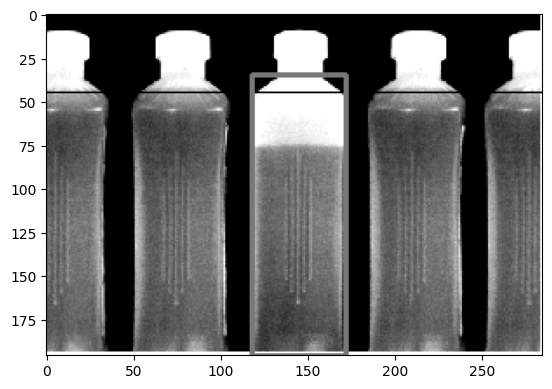

In [5]:
# ploteo el resultado

# cv2.rectangle(img_botella_min, (pos_x,lim_y-10), (pos_x+int(dif_pixeles/2),size_y), color=(120, 120, 0) , thickness=2)
for i in range(0,len(vector_botellas)):
  aux = vector_botellas[i]
  punto0 = aux[0]
  print(punto0)
  punto1 = aux[1]
  print(punto1)
  cv2.rectangle(img_botella_min, punto0, punto1, color=(120, 120, 0) , thickness=2)


plt.figure()
plt.imshow(img_botella_min,cmap='gray')
plt.show()

## Informar cuan lleno esta

In [10]:
img = cv2.imread(url_img_botella,cv2.IMREAD_GRAYSCALE)
cv2.line(img, (146,15), (146,50), color=255 , thickness=1)
for i in range(0,len(vector_botellas)):
  print("botella no llena ",i+1,":")
  botella = vector_botellas[i]
  punto1 = botella[0]; punto2 = botella[1]
  y = lim_y+1
  #buscamos hasta que pixel se encuentra llena la llena la botella
  print(img[145,0:50])
  print("  as",img[punto1[0]+(punto2[0]-punto1[0])//2,y])
  while img[int(punto1[0]+(punto2[0]-punto1[0])/2),y] > 50 and y < size_y:
    y+=1
    print(y)
  porcentaje_llenado = 100-(y-lim_y)*100/(size_y-lim_y)
  print("porcentaje de llenado: ",porcentaje_llenado)

botella no llena  1 :
[ 95 129 100  91 100 142  95 103 128 133 100 105 148 120 114 112 117 108
 109 109 112 128 116 117 109 139 114 114 140 156 167 158 220  63   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  as 0
porcentaje de llenado:  99.33774834437087


## Guía 2 - Ejercicio 4.2 / Guía 2 - Ejercicio 4.3


In [13]:
def multiplicacion_imagen(img,mask):
    roi = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            roi[i,j] = img[i,j]*mask[i,j]
            # roi[i,j] = np.clip( roi[i,j].astype(np.uint8) , 0, 255)
    return roi/255

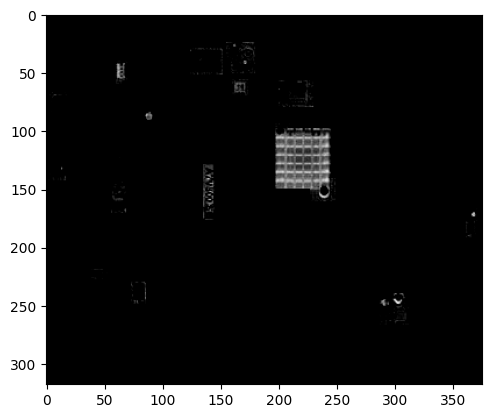

In [14]:
# EJRCICIO 4.2
# Primero usamos la resta para darnos cuenta que lugares son los mas diferenciables entre ambas placas
placa_SE = plt.imread("a7v600-SE.gif",cv2.IMREAD_GRAYSCALE)
placa_X = plt.imread("a7v600-X.gif",cv2.IMREAD_GRAYSCALE)
placa_SE_ruido = plt.imread("a7v600-SE(RImpulsivo).gif",cv2.IMREAD_GRAYSCALE)
placa_X_ruido = plt.imread("a7v600-X(RImpulsivo).gif",cv2.IMREAD_GRAYSCALE)

dif = cv2.subtract(placa_SE,placa_X)
plt.imshow(dif,cmap='gray')

mask = np.zeros(placa_X.shape).astype(np.uint8)
mask[100:150,200:250] = 1
placa_SE_roi = multiplicacion_imagen(placa_SE,mask)
placa_X_roi = multiplicacion_imagen(placa_X,mask)

In [21]:
def tipo_placa(placa,mask):
    tipo_placa = ''
    placa_roi = multiplicacion_imagen(placa,mask)
    dif_SE = cv2.subtract(placa_roi,placa_SE_roi)
    dif_X = cv2.subtract(placa_roi,placa_X_roi)
    if np.sum(dif_X**2) < np.sum(dif_SE**2):
        tipo_placa = 'a7v600-X'
    else:
        tipo_placa = 'a7v600-SE'
    #print(np.sum(dif**2))
    return tipo_placa

In [22]:
mask = np.zeros(placa_X_ruido_roi.shape).astype(np.uint8)
mask[100:150,200:250] = 1
print(tipo_placa(placa_SE,mask))
print(tipo_placa(placa_X,mask))
print(tipo_placa(placa_X_ruido,mask))
print(tipo_placa(placa_SE_ruido,mask))

a7v600-SE
a7v600-X
a7v600-X
a7v600-SE


error_cuadratico 106.59835447904652
error_cuadratico_medio 0.0008939065365119205
error_cuadratico 134.57005767012686
error_cuadratico_medio 0.0011284700852840827


Text(0.5, 1.0, 'dif_X')

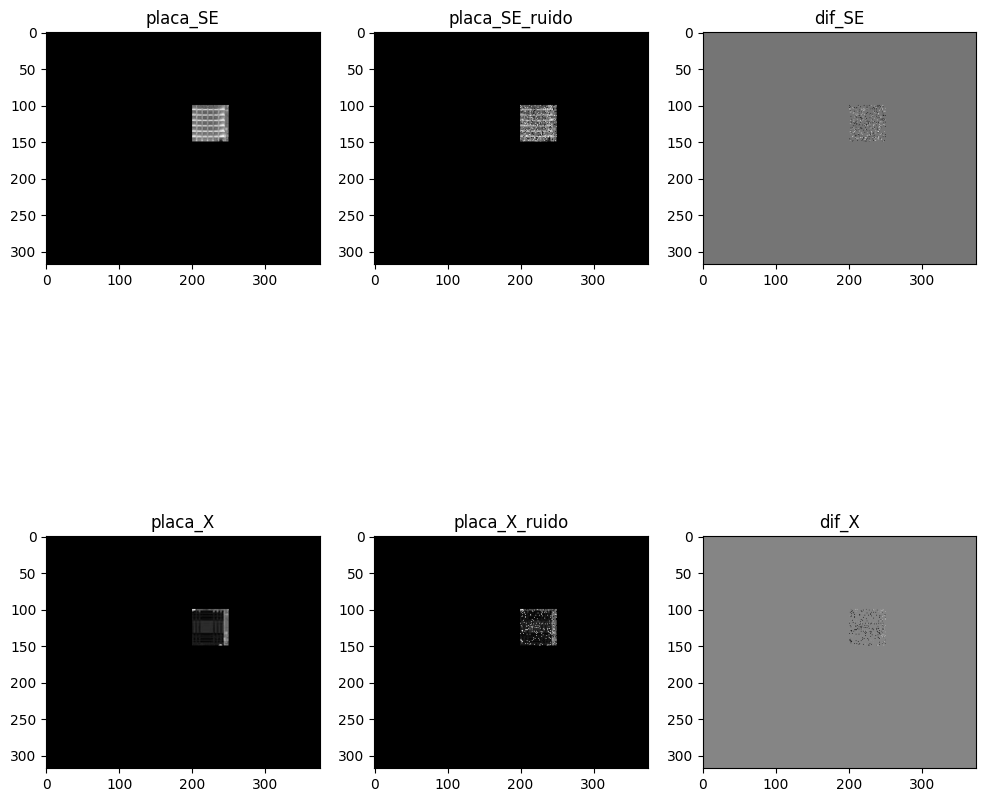

In [23]:
#vemos que encontramos una diferencia notable de arquitectura en el
# roi = x entre(100,150) e y entre (200,250)
#podemos recortar esa parte para diferenciar las placas

placa_X_ruido_roi = multiplicacion_imagen(placa_X_ruido,mask)
placa_SE_roi = multiplicacion_imagen(placa_SE,mask)
placa_SE_ruido_roi = multiplicacion_imagen(placa_SE_ruido,mask)
placa_X_roi = multiplicacion_imagen(placa_X,mask)

dif_SE_roi = cv2.subtract(placa_SE_roi,placa_SE_ruido_roi)
print('error_cuadratico', np.sum(dif_SE_roi**2))
print('error_cuadratico_medio' ,np.mean(dif_SE_roi**2))
dif_X_roi = cv2.subtract(placa_X_roi,placa_X_ruido_roi)
print('error_cuadratico', np.sum(dif_X_roi**2))
print('error_cuadratico_medio' ,np.mean(dif_X_roi**2))
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,12))
ax[0,0].imshow(placa_SE_roi,cmap='gray'); ax[0,0].set_title("placa_SE")
ax[0,1].imshow(placa_SE_ruido_roi,cmap='gray'); ax[0,1].set_title("placa_SE_ruido")
ax[0,2].imshow(dif_SE_roi,cmap='gray'); ax[0,2].set_title("dif_SE")
ax[1,0].imshow(placa_X_roi,cmap='gray'); ax[1,0].set_title("placa_X")
ax[1,1].imshow(placa_X_ruido_roi,cmap='gray'); ax[1,1].set_title("placa_X_ruido")
ax[1,2].imshow(dif_X_roi,cmap='gray'); ax[1,2].set_title("dif_X")

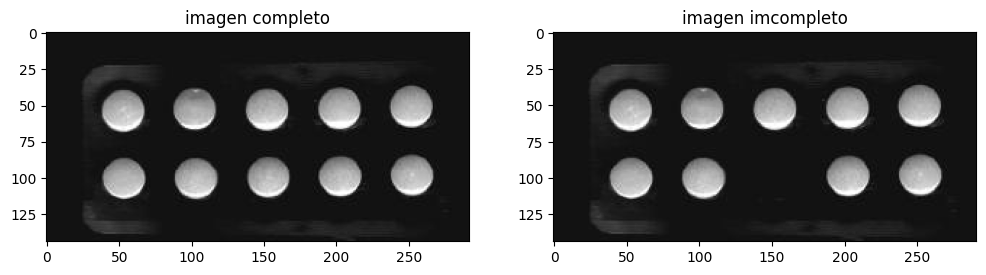

In [26]:
# EJERCICIO 4.3
blister_completo = cv2.imread('blister_completo.jpg',cv2.IMREAD_GRAYSCALE)
blister_incompleto = cv2.imread('blister_incompleto.jpg',cv2.IMREAD_GRAYSCALE)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

ax[0].imshow(blister_completo,cmap='gray')
ax[0].set_title('imagen completo')
ax[1].imshow(blister_incompleto,cmap='gray')
ax[1].set_title('imagen imcompleto')
plt.show()

In [33]:
# Función para crear una LUT por tamos
# tengo que pasar como parametros:
# tramos: vector que representa donde empieza y termina cada tramo
# a y c son vectores con el mismo tamaño que v, donde cada a,c[i] corresponde a cada tramo
def make_lut_tramos(a,c,tramos):
    iteraciones = len(tramos)
    lut = np.zeros(256, dtype=np.uint8)
    for i in range(iteraciones):
        # aplico el clip, para que no se vaya de [0,255]
        tramo = tramos[i]
        lut[ tramo ] = np.clip( (a[i]*tramo + c[i]).astype('int') , 0, 255)
    return lut

def diferencia_imagenes(dif,img1,img2):
    img_salida = img1 - img2
    # metodo 1 -> sumar 255 y dividir por 2
    if dif == 0:
        img_salida = ( (img_salida + 255)*0.5 ).astype(np.uint8)
    # metodo 2 -> restar el mınimo y escalar a 255
    else:
        img_salida = np.clip( (img_salida - np.min(img_salida) ).astype(np.uint8) , 0, 255)
    return img_salida

In [34]:
def buscar_faltante(img):
    faltantes = []
    # defino una grilla -> imagen en "grilla.png"
    puntos_y = [25,75,125]
    puntos_x = [25,75,125,175,225,275]
    # defino un tono de intensidad promedio -> si esta por debajo entonces hay un faltante
    intensidad_max = 110
    for i in range(len(puntos_y)-1):
        for j in range(len(puntos_x)-1):
            print('promedio ',np.mean(img[puntos_y[i]:puntos_y[i+1],puntos_x[j]:puntos_x[j+1]]))
            if np.mean(img[puntos_y[i]:puntos_y[i+1],puntos_x[j]:puntos_x[j+1]]) < intensidad_max:
                faltantes.append([puntos_y[i],puntos_x[j]])
    return faltantes

def revisar_blister(img):
    img_completa = cv2.imread('blister_completo.jpg',cv2.IMREAD_GRAYSCALE)
    if img.shape != img_completa.shape:
        img_completa = cv2.resize(blister_completo, img.shape[::-1])

    tramos_v = [np.arange(0,100),np.arange(100,256)]
    a_v = [0,1]
    c_v = [0,0]
    lut = make_lut_tramos(a_v,c_v,tramos_v)

    img_completa_lut = cv2.LUT(img_completa, lut)
    img_lut = cv2.LUT(img, lut)

    img_dif = diferencia_imagenes(0,img_lut,img_completa_lut)
    faltantes = buscar_faltante(img_dif)

    fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(12,12))
    ax[0].imshow(img_completa_lut,cmap='gray')
    ax[0].set_title('imagen completo')
    ax[1].imshow(img_lut,cmap='gray')
    ax[1].set_title('imagen imcompleto')
    ax[2].imshow(img_dif,cmap='gray')
    ax[2].set_title('diferencia imagen')
    if len(faltantes) > 0:
        print('faltantes en los puntos: ',faltantes)
        for faltante in faltantes:
            ax[2].plot([faltante[1],faltante[1]+50],[faltante[0],faltante[0]],'-b')
            ax[2].plot([faltante[1],faltante[1]],[faltante[0],faltante[0]+50],'-b')
            ax[2].plot([faltante[1]+50,faltante[1]+50],[faltante[0],faltante[0]+50],'-b')
            ax[2].plot([faltante[1],faltante[1]+50],[faltante[0]+50,faltante[0]+50],'-b')
    else:
        print('No hay faltantes')
    plt.show()

promedio  116.9176
promedio  116.9696
promedio  114.8432
promedio  114.382
promedio  111.9256
promedio  120.19
promedio  114.4472
promedio  105.32
promedio  114.9928
promedio  113.8276
faltantes en los puntos:  [[75, 125]]


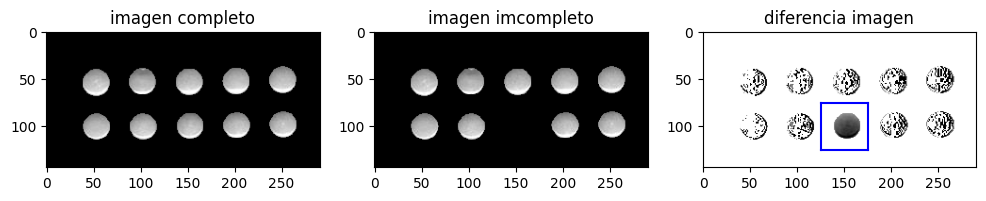

In [37]:
blister_incompleto = cv2.imread('blister_incompleto.jpg',cv2.IMREAD_GRAYSCALE)
revisar_blister(blister_incompleto)

## Guía 2.2 - Ejercicio 1.2

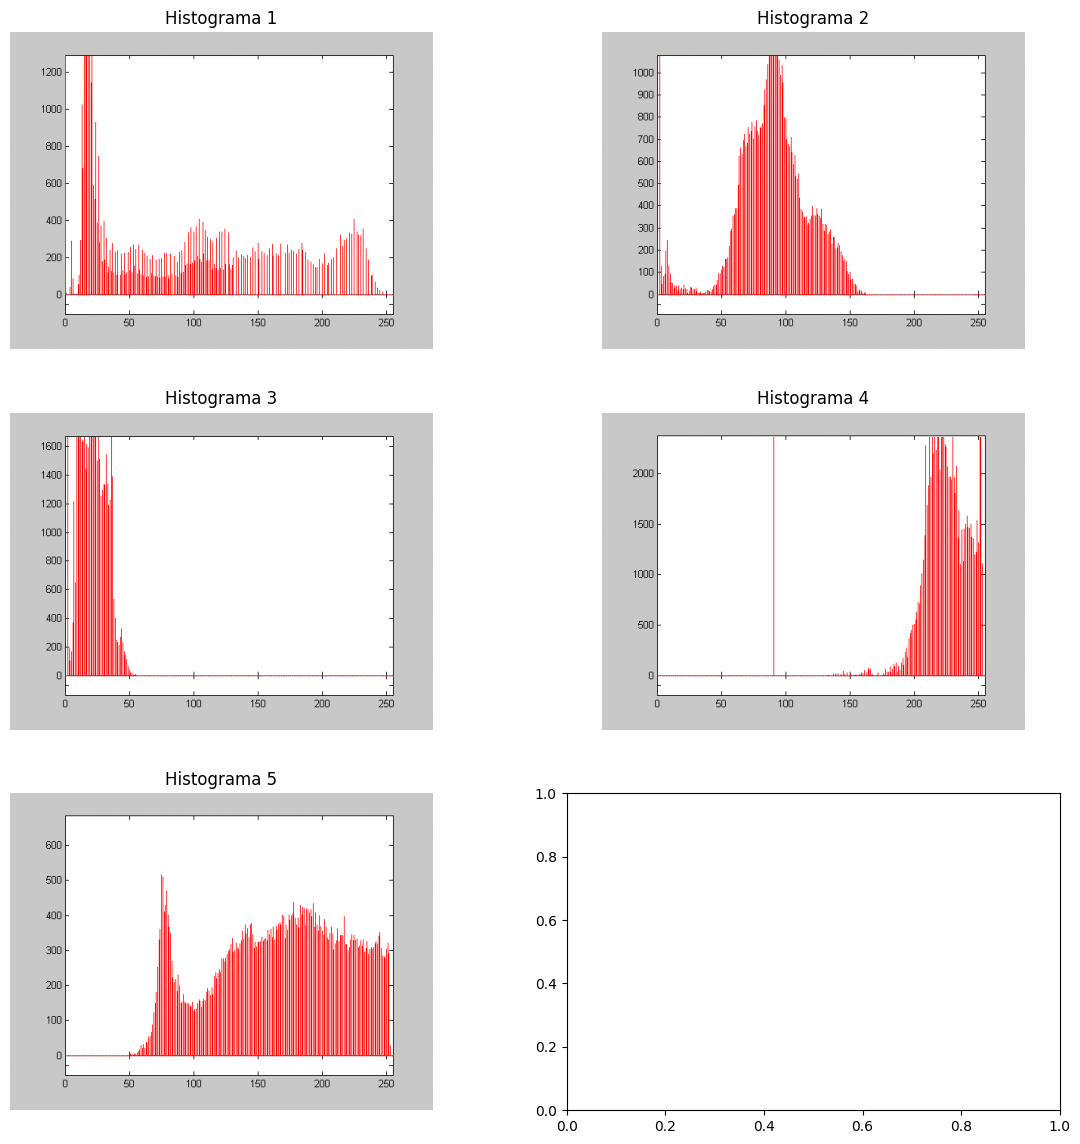

In [39]:
# EJERCICIO 1.2
histo1 = cv2.imread('histo1.tif',cv2.IMREAD_COLOR)
histo2 = cv2.imread('histo2.tif',cv2.IMREAD_COLOR)
histo3 = cv2.imread('histo3.tif',cv2.IMREAD_COLOR)
histo4 = cv2.imread('histo4.tif',cv2.IMREAD_COLOR)
histo5 = cv2.imread('histo5.tif',cv2.IMREAD_COLOR)

fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(14,14))
ax[0,0].imshow(histo1)
ax[0,0].set_title('Histograma 1')
ax[0,0].axis('off')
ax[0,1].imshow(histo2)
ax[0,1].set_title('Histograma 2')
ax[0,1].axis('off')
ax[1,0].imshow(histo3)
ax[1,0].set_title('Histograma 3')
ax[1,0].axis('off')
ax[1,1].imshow(histo4)
ax[1,1].set_title('Histograma 4')
ax[1,1].axis('off')
ax[2,0].imshow(histo5)
ax[2,0].set_title('Histograma 5')
ax[2,0].axis('off')


plt.show()

Histograma 1: posee pixeles en la mayoria de las intensidades, pero la mayor concentracion se encuentra entre los primero 50 de intensidad, por lo que deberia ser una imagen donde prevalecen los pixeles oscuros

Histograma 2: la concentracion se da cerca de los 100, parece una distribucion gauseana, por lo que se puede decir que la imagen deberia ser bastante homogenea en intensidad y no tendria mucho contraste

Histograma 3: esta imagen posee todos los pixeles dentro del rango de intensidad [0,50], de modo que será muy oscura

Histograma 4: por el contrario a la imagen 3, en esta imagen, segun el histograma, deberia tener una intensidad clara, ya que la mayoria de los pixeles estan en las intensidades mayores a 150, salvo por algunos que se encuentra cerca de 100, que podrian ser aquellos de los bordes

Histograma 5: segun este histograma la imagen parece algo homogenea pero en escala de grises medios tirando a claros, ya que no tiene pixeles cuya insidad sea de 50 o menos
Segun estas deducciones los histogramas y las imagenes se corresponden:

Histograma 1 -> Imagen C

Histograma 2 -> Imagen D

Histograma 3 -> Imagen E

Histograma 4 -> Imagen B

Histograma 5 -> Imagen A


Histograma  1
Media : 234.375
Varianza : 131734.1484375
Asimetria : 2.296400637485128
Energia : 120000
Entropia : 6.592177233557798
-----------------------
Histograma  2
Media : 417.1875
Varianza : 726804.78515625
Asimetria : 2.2923460615364992
Energia : 213600
Entropia : 5.861619083261708
-----------------------
Histograma  3
Media : 234.375
Varianza : 211493.3984375
Asimetria : 5.47232331337086
Energia : 120000
Entropia : 6.739286398507357
-----------------------
Histograma  4
Media : 225.8359375
Varianza : 23729.613708496094
Asimetria : -0.40298121293204586
Energia : 115628
Entropia : 7.510771795048202
-----------------------
Histograma  5
Media : 234.375
Varianza : 392815.78125
Asimetria : 3.3058726261766265
Energia : 120000
Entropia : 5.203148086412085
-----------------------


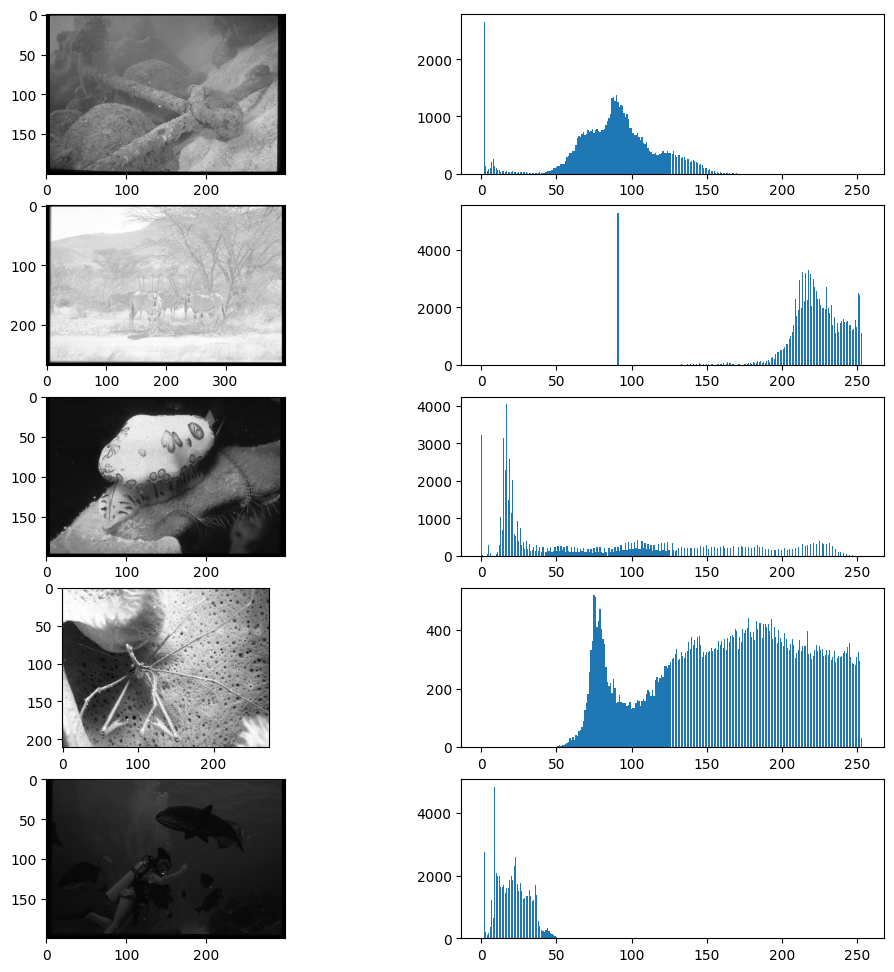

In [43]:
import scipy as scp

# cargo las imagenes y los histogramas
fig,ax = plt.subplots(ncols=2,nrows=5,figsize=(12,12))

# imagenes
imgA = cv2.imread('imagenA.tif',cv2.IMREAD_GRAYSCALE)
imgB = cv2.imread('imagenB.tif',cv2.IMREAD_GRAYSCALE)
imgC = cv2.imread('imagenC.tif',cv2.IMREAD_GRAYSCALE)
imgD = cv2.imread('imagenD.tif',cv2.IMREAD_GRAYSCALE)
imgE = cv2.imread('imagenE.tif',cv2.IMREAD_GRAYSCALE)

images = [imgA,imgB,imgC,imgD,imgE]

for i in range(0,5):
    # hist_2 = cv2.calcHist([img_patron2],[0],None,[256],[0,256]).astype(int)
    # hist_1 = [elemento for sublist in hist_1 for elemento in sublist]
    # ax[0].bar(x=np.arange(0,256),height=hist_1,color='blue')

    hist = cv2.calcHist([images[i]],[0],None,[256],[0,256]).astype(int)
    hist = [elemento for sublist in hist for elemento in sublist]
    ax[i,0].imshow(images[i],cmap='gray')
    ax[i,1].bar(x=np.arange(0,256),height=hist)
    # Obtenga y analice la utilidad de las siguientes propiedades estadısticas de los histogramas: media, varianza, asimetrıa, energıa y entropıa.
    print('Histograma ',str(i+1))
    print('Media :',np.mean(hist))
    print('Varianza :',np.var(hist))
    print('Asimetria :',scp.stats.skew(hist))
    print('Energia :',np.sum(np.dot(hist,2)))

    probabilidades = hist / np.sum(hist)
    probabilidades = probabilidades[probabilidades != 0]
    print('Entropia :',-np.sum(probabilidades * np.log2(probabilidades)))
    print('-----------------------')

#La media es el valor promedio de todos los pixeles y nos puede servir para saber el brillo medio de la imagen. Puede ser util
    #para ajustar el constraste o la exposicion de la imagen
#La varianza indica el nivel de variabilidad de la imagen, una varianza baja indica un distribucion uniforme de la imagen y puede indicar homogeneidad
    #una varianza alta puede indicar buena textura.
#La entropía es una medida de la cantidad de informacion o aleatoriedad presente en la imagen. Una entropía alta indica una distribucion de pixeles
    # mas aleatoria y mayor complejidad en la imagen, mientras que untra entropia baja indica un distribucion mas uniforme y predecible.
#La asimetria: una asimetria positiva indica una cola mas larga del lado derecho de la media y una negativa una cola mas larga del lado izqueirdo de la media
#La energía: la energia por si sola si es muy alta podria decir que hay pixeles mas blanco pero no es un medida que sirva
    # en cambio si verificamos que tiene mucha variabilidad y mucha energia a la vez puede significar que tenga un alto contraste.

## Guía 3 - Ejercicio 4.2

In [45]:
def crear_filtro_promediador(kernel_size,tipo):
  if tipo == 0:
    # filtro de caja para suavizar una imagen reduciendo el ruido y eliminando detalles pequeños
    return np.ones((kernel_size,kernel_size),np.float32) / (kernel_size*kernel_size)
  else:
    # filtro de cruz
    filtro = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    filtro[:, int(kernel_size/2)] = 1.0
    filtro[int(kernel_size/2), :] = 1.0
    return filtro / kernel_size

Text(0.5, 1.0, 'filtro bilateal lapices')

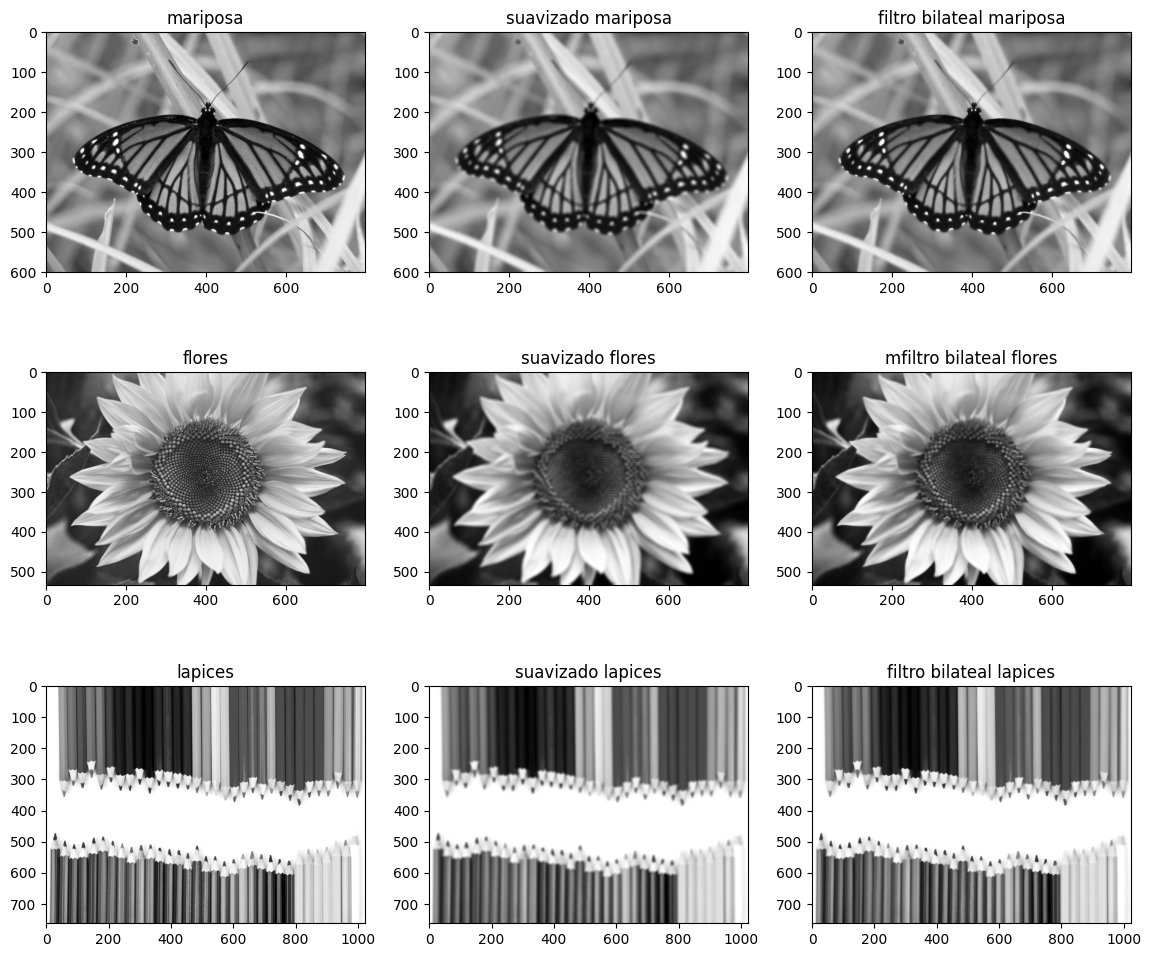

In [48]:
mariposa02 =cv2.imread('mariposa02.png',cv2.IMREAD_GRAYSCALE)
flores02 =cv2.imread('flores02.jpg',cv2.IMREAD_GRAYSCALE)
lapices02 =cv2.imread('lapices02.jpg',cv2.IMREAD_GRAYSCALE)


#common smoothing filters
kernel_size = 9
filtro_caja = crear_filtro_promediador(kernel_size,tipo=0)
filtro_mapiposa = crear_filtro_promediador(kernel_size,tipo=0) # tipo 0 caja
mariposa_suaviazada = cv2.filter2D(mariposa02, -1, filtro_caja)
filtro_flores = crear_filtro_promediador(kernel_size,tipo=0) # tipo 0 caja
flores_suaviazada = cv2.filter2D(flores02, -1, filtro_caja)
filtro_lapices = crear_filtro_promediador(kernel_size,tipo=0) # tipo 0 caja
lapices_suaviazada = cv2.filter2D(lapices02, -1, filtro_caja)

#bilateral filter: taking into account both the spatial distance and diferent in intensity
  # the bilateral filter is able to soften the image while preserving the important edges and details
d = 9             # Diameter of each pixel neighborhood
sigma_color = 75  # Filter sigma in the color space
sigma_space = 75  # Filter sigma in the coordinate space
bf_mariposa = cv2.bilateralFilter(mariposa02, d, sigma_color, sigma_space)
bf_flores = cv2.bilateralFilter(flores02, d, sigma_color, sigma_space)
bf_lapices = cv2.bilateralFilter(lapices02, d, sigma_color, sigma_space)

fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(14,12))
ax[0,0].imshow(mariposa02,cmap='gray');ax[0,0].set_title('mariposa')
ax[0,1].imshow(mariposa_suaviazada,cmap='gray');ax[0,1].set_title('suavizado mariposa')
ax[0,2].imshow(bf_mariposa,cmap='gray');ax[0,2].set_title('filtro bilateal mariposa')

ax[1,0].imshow(flores02,cmap='gray');ax[1,0].set_title('flores')
ax[1,1].imshow(flores_suaviazada,cmap='gray');ax[1,1].set_title('suavizado flores')
ax[1,2].imshow(bf_flores,cmap='gray');ax[1,2].set_title('mfiltro bilateal flores')

ax[2,0].imshow(lapices02,cmap='gray');ax[2,0].set_title('lapices')
ax[2,1].imshow(lapices_suaviazada,cmap='gray');ax[2,1].set_title('suavizado lapices')
ax[2,2].imshow(bf_lapices,cmap='gray');ax[2,2].set_title('filtro bilateal lapices')


Text(0.5, 1.0, 'intensity with bilateral filter')

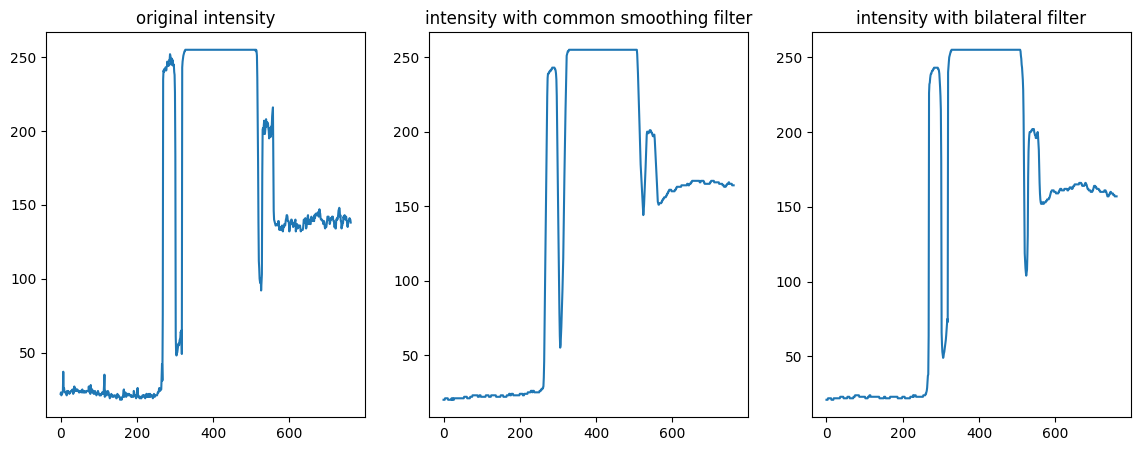

In [50]:
# eligimos fila 300 de lapices
fila = 300
# obtengo la intensidad de toda la fila
intensidad_original = lapices02[:,fila]
intensidad_suaviazada = lapices_suaviazada[:,fila]
intensidad_bilateral = bf_lapices[:,fila]

# dibujo la linea
#cv.line(img_gray2_c, (col,0), (col,m), color=(0, 255, 0) , thickness=4)
fig, ax2 = plt.subplots(nrows=1, ncols=3, figsize=(14,5))
ax2[0].plot(intensidad_original); ax2[0].set_title("original intensity")
ax2[1].plot(intensidad_suaviazada);ax2[1].set_title("intensity with common smoothing filter")
ax2[2].plot(intensidad_bilateral);ax2[2].set_title("intensity with bilateral filter")


## Guía 4 - Ejercicio 4 (opcional) / Guía 4 - Ejercicio 5.2